[' attached', ' entitled', ' alone', ' happy', ' entitled']
Counter({' entitled': 2, ' attached': 1, ' alone': 1, ' happy': 1})
Negative Sentiment


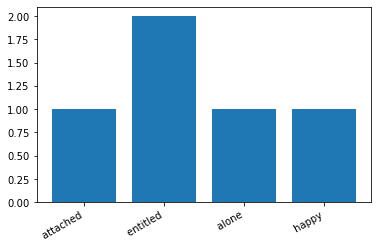

In [5]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

%run twitter_analysis.ipynb

# #------obtenir des tweets en utilisant l'internet----------------

# # la fonction 'get_tweets' a deux paramètres
# # le 1er est le mots a rechercher
# # le 2eme le nombre maximum des tweet

# text = ""
# text_tweets = get_tweets("covid19",50)
# length = len(text_tweets)

# for i in range(0, length):
#     text = text_tweets[i][0] + " " + text

# # ecriture des tweet dans le fichier read.txt
# fichier_texte = open("read.txt",  "w", encoding='utf-8' )
# fichier_texte.write(text) 
# fichier_texte.close()
# #-------------------------------------------------------------

# ouverture et lecture du fichier read.txt qui contient les tweets
text = open('read.txt', encoding='utf-8').read()

# conversion en minuscules
lower_case = text.lower()

# Suppression des ponctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Utilisation word_tokenize plus rapide que split ()
tokenized_words = word_tokenize(cleaned_text, "english")

# Suppression Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

# Tracer les émotions sur le graphique
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()
